In [1]:
import matplotlib
import matplotlib.pyplot as plt
import branca.colormap as cmp
import cartopy.crs as ccrs
import geopandas as gpd
import folium
import xarray as xr
import numpy as np
import cartopy.feature as cfeature

In [2]:
caption = "Precipitation [inches/day]"

nws_precip_colors = ["#7be6fb", "#7cbcf8", "#5cace4", "#0c52cd", "#98f09d", "#1abb24", "#117d18", "#083e0c",
                     "#fff489", "#d6c300", "#8e8200", "#474100", "#f5a092", "#ed4a2f", "#831b0b", "#410d05",
                     "#e4a3d2", "#cc50a9", "#8a276e", "#531742", "#d0b8d0", "#a37ac2", "#ccf4fa", "#FCF9C5"]

precip_colormap = matplotlib.colors.ListedColormap(nws_precip_colors)

color_bins = [0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 1.25, 1.5, 1.75, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12] 

digit_bins = np.arange(1, 25, 1)

colormap = cmp.StepColormap(nws_precip_colors, vmin=0.01, vmax=12, index=color_bins, caption=caption)

colormap

In [ ]:
# Execute this cell to convert the shapefile to GeoJSON file


# # Load your shapefile into a geopandas dataframe
# shp = gpd.read_file('shapefile/conus/conus_buffer_1p0deg.shp')

# # Convert the GeoDataFrame to GeoJSO
# shp.to_file('conus_buffer_1p0deg.geojson', driver='GeoJSON')

In [3]:
filepath = 'data/CONUS_24h_2013.nc'
ds = xr.open_dataset(filepath)
data = ds['p01d_12z']

In [4]:
dat = data[24,:,:]
dat = dat.where(dat >= 1, np.nan)

bounds = [[float(dat.lat.min().values), float(dat.lon.min().values)], [float(dat.lat.max().values), float(dat.lon.max().values)]]

In [5]:
# Plot and save ubsetted data
fig = plt.figure()
fig.patch.set_alpha(0)

ax = plt.axes(projection=ccrs.Mercator())

#ax.axis('off')

plt.pcolormesh(dat.lon, dat.lat, dat, transform=ccrs.PlateCarree(), cmap=precip_colormap)

plt.savefig(f'radar.png', bbox_inches='tight', pad_inches=0, transparent=True, dpi=300)

plt.close()


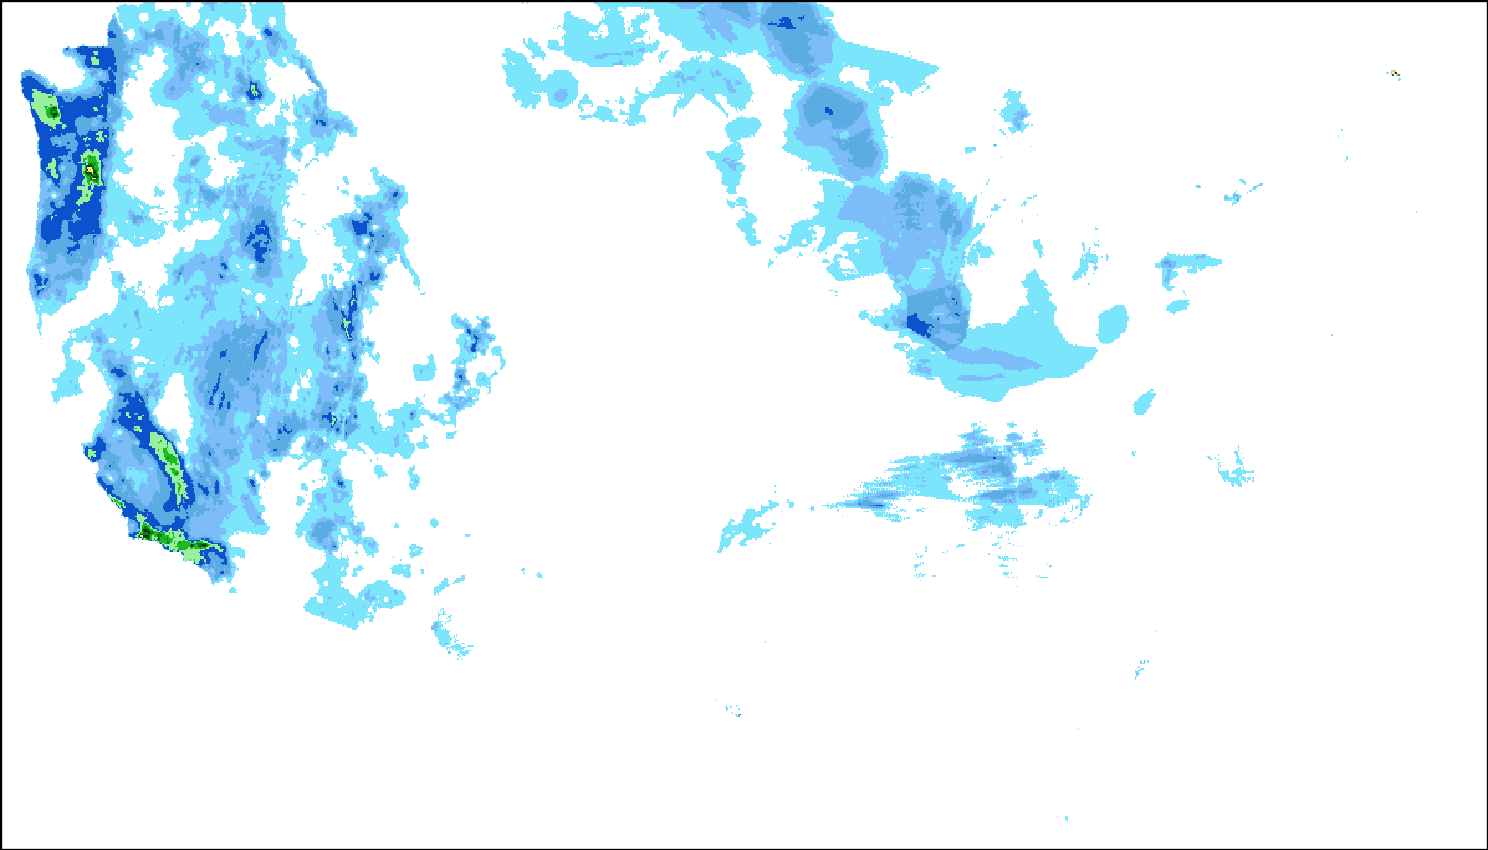

In [6]:
center_lat, center_lon = 35, -80
# Create a Map instance
m = folium.Map(location=[center_lat, center_lon], zoom_start=5)

# Add the GeoJSON layer to the map
folium.GeoJson('conus_buffer_1p0deg.geojson').add_to(m)

layer1 = folium.FeatureGroup(name="Radar Daily", show=False)  

layer1.add_child(folium.raster_layers.ImageOverlay(name="overlay", image='radar.png', bounds=bounds))

colormap.add_to(m)

layer1.add_to(m)

# Add LatLngPopup
m.add_child(folium.LatLngPopup())